## Mean-Variance Analysis and CAPM

Consider a market with $d=3$ risky assets and 1 risk-free asset with the following parameters:

$$
\mu = \begin{bmatrix} 
6\% \\
2\% \\
4\%
\end{bmatrix}, \quad
V = \begin{bmatrix}
8.0 & -2.0 & 4.0 \\
-2.0 & 2.0 & -2.0 \\
4.0 & -2.0 & 8.0
\end{bmatrix} \times 10^{-3}, \quad r_f = 1\%
$$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import risk_kit as rk
from portfolio import MeanVarPortfolio

In [2]:
mu = np.array([6, 2, 4]) / 100
V = np.array([[8.0, -2.0, 4.0],
              [-2.0, 2.0, -2.0],
              [4.0, -2.0, 8.0]]) * 10 ** -3
rf = 1/100

<Axes: xlabel='Volatility'>

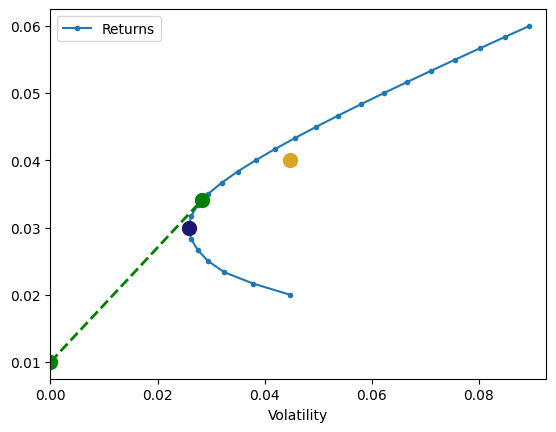

In [3]:
portfolio = MeanVarPortfolio(er=mu,
                            covmat=V)
portfolio.plot_ef(n_points=25,
                 show_cml=True,
                 riskfree_rate=rf,
                 show_ew=True,
                 show_gmv=True)

The plot above shows the effecient frontier.

The Capital Market Line is represented by the greed dotted line.

The Green Mark represents the Maximum Sharpe Portfolio.

The Yellow Mark represents the equally weighted portfolio.

The Purple Mark represents the Global Minimum Variance portfolio.

### Question 1

Compute the mean return on the portfolio $x = \frac{1}{3}(1,1,1)$ consisting only of the risky assets.

In [4]:
weights = np.array([1, 1, 1]) / 3
ret, vol = portfolio.get_point(weights)

round(ret * 100, 2)

4.0

$$
\sum_{i=1}^3 \mu_i x_i = \frac{1}{3}(6+2+4) = \frac{12}{3} = 4\%
$$

### Question 2

Compute the volatility of the return on the portfolio $x = \frac{1}{3}(1,1,1)$ consisting only of the risky assets

In [5]:
round(vol * 100, 2)

4.47

Let $x=\frac{1}{3}(1,1,1)^T$. Then:
$
\sigma_x = 100\sqrt{x'Vx} = 4.4721\% = 4.47\%
$

### Question 3

Compute the mean return on the minimum variance portfolio of just the risky assets.

The minimum variance portfolio is defined as the portfolio of risky assets that has the least volatility among all possible portfolios of just the risky assets. This portfolio is the solution to the optimization problem

$$
\begin{array}{ll}
\min & \sigma_{x}^{2} = min x^TVx \\
\text{s.t.} & \sum_{i=1}^d x_i = 1
\end{array}
$$

In [6]:
weights_gmv = portfolio.gmv()
ret, vol = portfolio.get_point(weights_gmv)
round(ret * 100, 2)

3.0

The minimum variance portfolio is given by:
$
x_{min} = \frac{1}{\sum_{i=1}^d (V^{-1}1)_i} \cdot V^{-1}1
$
Therefore, the mean return is given by:
$
\frac{1}{\sum_{i=1}^d (V^{-1}1)_i} \cdot \mu^T V^{-1}1 = 3\%
$

### Question 4

Compute the mean return on the Sharpe optimal portfolio for this market.

Recall that we can compute the Sharpe optimal portfolio by taking only the risky positions and re-scaling them so that the components add up to 1. This procedure can be done by using the functions in following worksheet "Sheet 1". Another way to compute the Sharpe portfolio is to use the formulas of the Sharpe portfolio.

In [7]:
weights_msr = portfolio.msr(riskfree_rate=rf)
ret, vol = portfolio.get_point(weights_msr)
round(ret * 100, 2)

3.42

The Sharpe optimal portfolio is given by:
$
x_{sh} = \frac{1}{\sum_{i=1}^d (V^{-1}\hat{\mu})_i} \cdot V^{-1}\hat{\mu}
$
where $\hat{\mu}$ denotes the excess return. Therefore, the mean return is given by:
$
\mu_{sh} = \frac{1}{\sum_{i=1}^d (V^{-1}\hat{\mu})_i} \cdot \mu^T V^{-1}\hat{\mu} = 3.4167\% \approx 3.42\%
$

### Question 5

Compute the volatility of the Sharpe optimal portfolio for this market.

Recall that we can compute the Sharpe optimal portfolio by taking the risky positions corresponding to any risk aversion parameter and re-scaling them so that the components add up to 1.

In [8]:
round(vol * 100, 2)

2.84

The Sharpe optimal portfolio is given by:
$
x_{sh} = \frac{1}{\sum_{i=1}^d (V^{-1}\hat{\mu})_i} \cdot V^{-1}\hat{\mu}
$
Therefore, the variance is given by:
$
vol_{sh}^2 = \frac{1}{(\sum_{i=1}^d (V^{-1}\hat{\mu})_i)^2} \cdot \hat{\mu}^T V^{-1}VV^{-1}\hat{\mu}
$
From this we can compute the volatility to be $2.8382\% \approx 2.84\%$.

### Question 6

Using the results in the previous question, compute the slope of the capital market line.

In [9]:
slope, intercept = portfolio.get_cml(riskfree_rate=rf)
round(slope, 2)

0.85

$$
m = \frac{\mu_{sh}-r_f}{vol_{sh}} = 0.8515 \approx 0.85
$$

### Question 7

Suppose the volatility of a an efficient investment opportunity is $σ=5%$. What is the return on this opportunity?

Recall that the mean return and volatility of all efficient investment opportunities must lie on the capital market line.

In [10]:
sigma = 5 / 100
round(portfolio.max_return_cml(sigma, rf) * 100, 2)

5.26

$$
r = r_f + m\sigma = 1\% + (0.8515)(5\%) = 5.2573\% \approx 5.26\%
$$